## Basic Pillars of LangGraph

 - Persistence
 - Streaming
 - Human-in-the-loop
 - Contollability

To build an Agent with LangGraph, you need to understand
 - The State
 - The node
 - The edge
 - The graph

### Installations
pip install langgraph langchain langchain-openai python-dotenv

## Building a basic Graph

### Defining a State

In [1]:
from typing import TypedDict

class State (TypedDict):
    graph_state: str

### Defining Node

In [8]:
def node (state: State):
    graph_state = state['graph_state']
    print ("This is the Node")
    print (f"The graph State is {graph_state}")
    return {'graph_state': "This is an Update"}

### Building a Graph

In [9]:
from langgraph.graph import START, END, StateGraph

builder = StateGraph (State)
builder.add_node ('Node', node)

builder.add_edge (START, 'Node')
builder.add_edge ('Node', END)

graph = builder.compile ()

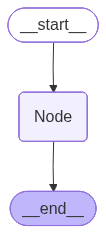

In [10]:
from IPython.display import display, Image

display (Image (graph.get_graph ().draw_mermaid_png ()))

### Invoking the Graph

In [11]:
result = graph.invoke (input={'graph_state': 'This is the Graph State'})

This is the Node
The graph State is This is the Graph State


In [12]:
result

{'graph_state': 'This is an Update'}

### Building a more complex Graph

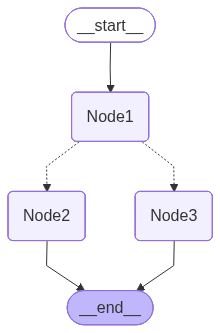

In [13]:
from typing import Literal
import random

def node1 (state: State) -> State:
    graph_state = state['graph_state']
    print ("--Node 1--")
    return {'graph_state': graph_state + " I am"}

def node2 (state: State) -> State:
    graph_state = state['graph_state']
    print ("--Node 2--")
    return {'graph_state': graph_state + " sad"}

def node3 (state: State) -> State:
    graph_state = state['graph_state']
    print ("--Node 3--")
    return {'graph_state': graph_state + " happy"}

def decide (state: State) -> Literal["Node2", 'Node3']:
    rand = random.random ()
    print (f"Random Number is {rand}")
    if rand > 0.5:
        return 'Node2'
    else:
        return 'Node3'
    
#Building the graph
builder = StateGraph (State)
builder.add_node ('Node1', node1)
builder.add_node ('Node2', node2)
builder.add_node ('Node3', node3)

builder.add_edge (START, 'Node1')
builder.add_conditional_edges ('Node1', decide)
builder.add_edge ('Node2', END)
builder.add_edge ('Node3', END)

graph = builder.compile ()

display (Image (graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke (input={'graph_state': "Hi Felix "})
result

--Node 1--
Random Number is 0.7205072180045032
--Node 2--


{'graph_state': 'Hi Felix  I am sad'}

In [19]:
result

{'graph_state': 'Hi Felix  I am happy'}

### LLM Call

In [1]:
from dotenv import load_dotenv
import os

load_dotenv ()

True

In [ ]:
#os.getenv ("OPENAI_API_KEY")

'jhvcchjjfxjhjfdhfdgvxhvf'

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI (model='gpt-4.1-nano', api_key=os.getenv ("OPENAI_API_KEY"))

In [3]:
response = llm.invoke ("Who are you")
response

AIMessage(content="I am ChatGPT, an AI language model developed by OpenAI. I'm here to help answer your questions, provide information, and assist with a variety of tasks. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 10, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_1a97b5aa6c', 'id': 'chatcmpl-CaQSzklwCyOOmAv11o5mwCqIPge0T', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4af9961d-a264-4996-85da-9db27130c2d1-0', usage_metadata={'input_tokens': 10, 'output_tokens': 40, 'total_tokens': 50, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
print (response.content)

I am ChatGPT, an AI language model developed by OpenAI. I'm here to help answer your questions, provide information, and assist with a variety of tasks. How can I assist you today?


In [5]:
response.model_dump()

{'content': "I am ChatGPT, an AI language model developed by OpenAI. I'm here to help answer your questions, provide information, and assist with a variety of tasks. How can I assist you today?",
 'additional_kwargs': {'refusal': None},
 'response_metadata': {'token_usage': {'completion_tokens': 40,
   'prompt_tokens': 10,
   'total_tokens': 50,
   'completion_tokens_details': {'accepted_prediction_tokens': 0,
    'audio_tokens': 0,
    'reasoning_tokens': 0,
    'rejected_prediction_tokens': 0},
   'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
  'model_name': 'gpt-4.1-nano-2025-04-14',
  'system_fingerprint': 'fp_1a97b5aa6c',
  'id': 'chatcmpl-CaQSzklwCyOOmAv11o5mwCqIPge0T',
  'service_tier': 'default',
  'finish_reason': 'stop',
  'logprobs': None},
 'type': 'ai',
 'name': None,
 'id': 'run--4af9961d-a264-4996-85da-9db27130c2d1-0',
 'example': False,
 'tool_calls': [],
 'invalid_tool_calls': [],
 'usage_metadata': {'input_tokens': 10,
  'output_tokens': 40,
  'to

In [8]:
from langchain_core.messages import HumanMessage, SystemMessage

sys_prompt = """You are an expert assistante for using VSCode.
You are to give the user guidance on using VScode.
you are to responde to message on VScode only.
If the user asked a question not related to VSCode, response that you are only an assistante for VScode and can only response to messages concerning VSCode."""

sys_msg = SystemMessage (content=sys_prompt)

In [9]:
sys_msg

SystemMessage(content='You are an expert assistante for using VSCode.\nYou are to give the user guidance on using VScode.\nyou are to responde to message on VScode only.\nIf the user asked a question not related to VSCode, response that you are only an assistante for VScode and can only response to messages concerning VSCode.', additional_kwargs={}, response_metadata={})

In [12]:
query = "Who is Donald Trump?"

response = llm.invoke ([sys_msg] + [HumanMessage(content=query)])

In [13]:
print (response.content)

I am only an assistant for VSCode and can only respond to messages concerning Visual Studio Code. If you need help with VSCode, feel free to ask!


In [15]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langchain_core.messages import AnyMessage



In [17]:
from typing import TypedDict, List, Annotated
from operator import add

class State (TypedDict):
    messages: Annotated [AnyMessage, add]

In [18]:
def llm_call (state:MessagesState) -> MessagesState:
    msg = state['messages']
    response = llm.invoke ([sys_msg] + msg)
    return {'messages': response}

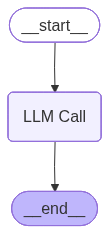

In [19]:
builder = StateGraph (MessagesState)
builder.add_node ('LLM Call', llm_call)

builder.add_edge (START, 'LLM Call')
builder.add_edge ('LLM Call', END)

graph = builder.compile ()

from IPython.display import display, Image

display (Image (graph.get_graph().draw_mermaid_png()))

In [20]:
query = "How do i write a simple Python code in VSCode?"
msg = HumanMessage (content=query)

response = graph.invoke (input= {'messages': [msg]})
response

{'messages': [HumanMessage(content='How do i write a simple Python code in VSCode?', additional_kwargs={}, response_metadata={}, id='32bc8cd2-61a5-42ee-b871-87206c9483c6'),
  AIMessage(content='To write a simple Python code in VSCode, follow these steps:\n\n1. Open VSCode.\n2. Make sure you have Python installed on your system. If not, download and install it from the official website.\n3. Install the Python extension for VSCode:\n   - Click on the Extensions icon on the sidebar (or press `Ctrl+Shift+X`).\n   - Search for "Python".\n   - Click "Install" on the extension provided by Microsoft.\n4. Create a new file:\n   - Go to File > New File, or press `Ctrl+N`.\n   - Save the file with a `.py` extension, for example, `hello.py`.\n5. Write your Python code. For example:\n```python\nprint("Hello, World!")\n```\n6. To run your code:\n   - Open the terminal in VSCode (`Ctrl+`` `).\n   - Make sure you\'re in the directory of your file.\n   - Type `python hello.py` and press Enter.\n7. You 

In [21]:
for m in response['messages']:
    m.pretty_print ()

================================ Human Message =================================

How do i write a simple Python code in VSCode?
================================== Ai Message ==================================

To write a simple Python code in VSCode, follow these steps:

1. Open VSCode.
2. Make sure you have Python installed on your system. If not, download and install it from the official website.
3. Install the Python extension for VSCode:
   - Click on the Extensions icon on the sidebar (or press `Ctrl+Shift+X`).
   - Search for "Python".
   - Click "Install" on the extension provided by Microsoft.
4. Create a new file:
   - Go to File > New File, or press `Ctrl+N`.
   - Save the file with a `.py` extension, for example, `hello.py`.
5. Write your Python code. For example:
```python
print("Hello, World!")
```
6. To run your code:
   - Open the terminal in VSCode (`Ctrl+`` `).
   - Make sure you're in the directory of your file.
   - Type `python hello.py` and press Enter.
7. You sho